In [ ]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

**Input Data**

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


**Changing Model**

In [ ]:
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

**Loss Function**

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

**Calculating Gradient**

In [ ]:
def dmodel_dw2(t_u, w2, w1, b):
    return t_u**2

In [ ]:
def dmodel_dw1(t_u, w2, w1, b):
    return t_u

In [ ]:
def dmodel_db(t_u, w2, w1, b):
    return 1.0

In [ ]:
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(),dloss_dw1.sum(), dloss_db.sum()])  # <1>

**Training loop using calculated gradient**

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params

        t_p = model(t_u, w2, w1, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)  # <2>
    

        params= params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

**Training Loop with autogradient**

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

**Training Loop Results**

In [ ]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-10, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), 
    t_u = t_u, 
    t_c = t_c)

tensor([ 7.9288e-01,  9.9676e-01, -5.3378e-05], requires_grad=True)

In [ ]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 1.0, 0.0],requires_grad=True), 
    t_u = t_u, 
    t_c = t_c)

tensor([nan, nan, nan], requires_grad=True)

In [ ]:
t_un = 0.1 * t_u

**0.1 Learning Rate**

In [ ]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([1.0, 1.0,0.0],requires_grad=True), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

**0.01 Learning Rate**

In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.01, 
    params = torch.tensor([1.0,1.0, 0.0],requires_grad=True), 
    t_u = t_un, 
    t_c = t_c)

params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

**0.001 Learning Rate**

In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.001, 
    params = torch.tensor([1.0,1.0, 0.0],requires_grad=True), 
    t_u = t_un, 
    t_c = t_c)

params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

**0.0001 Learning Rate**

In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.0001, 
    params = torch.tensor([1.0,1.0, 0.0],requires_grad=True), 
    t_u = t_un, 
    t_c = t_c)

params

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

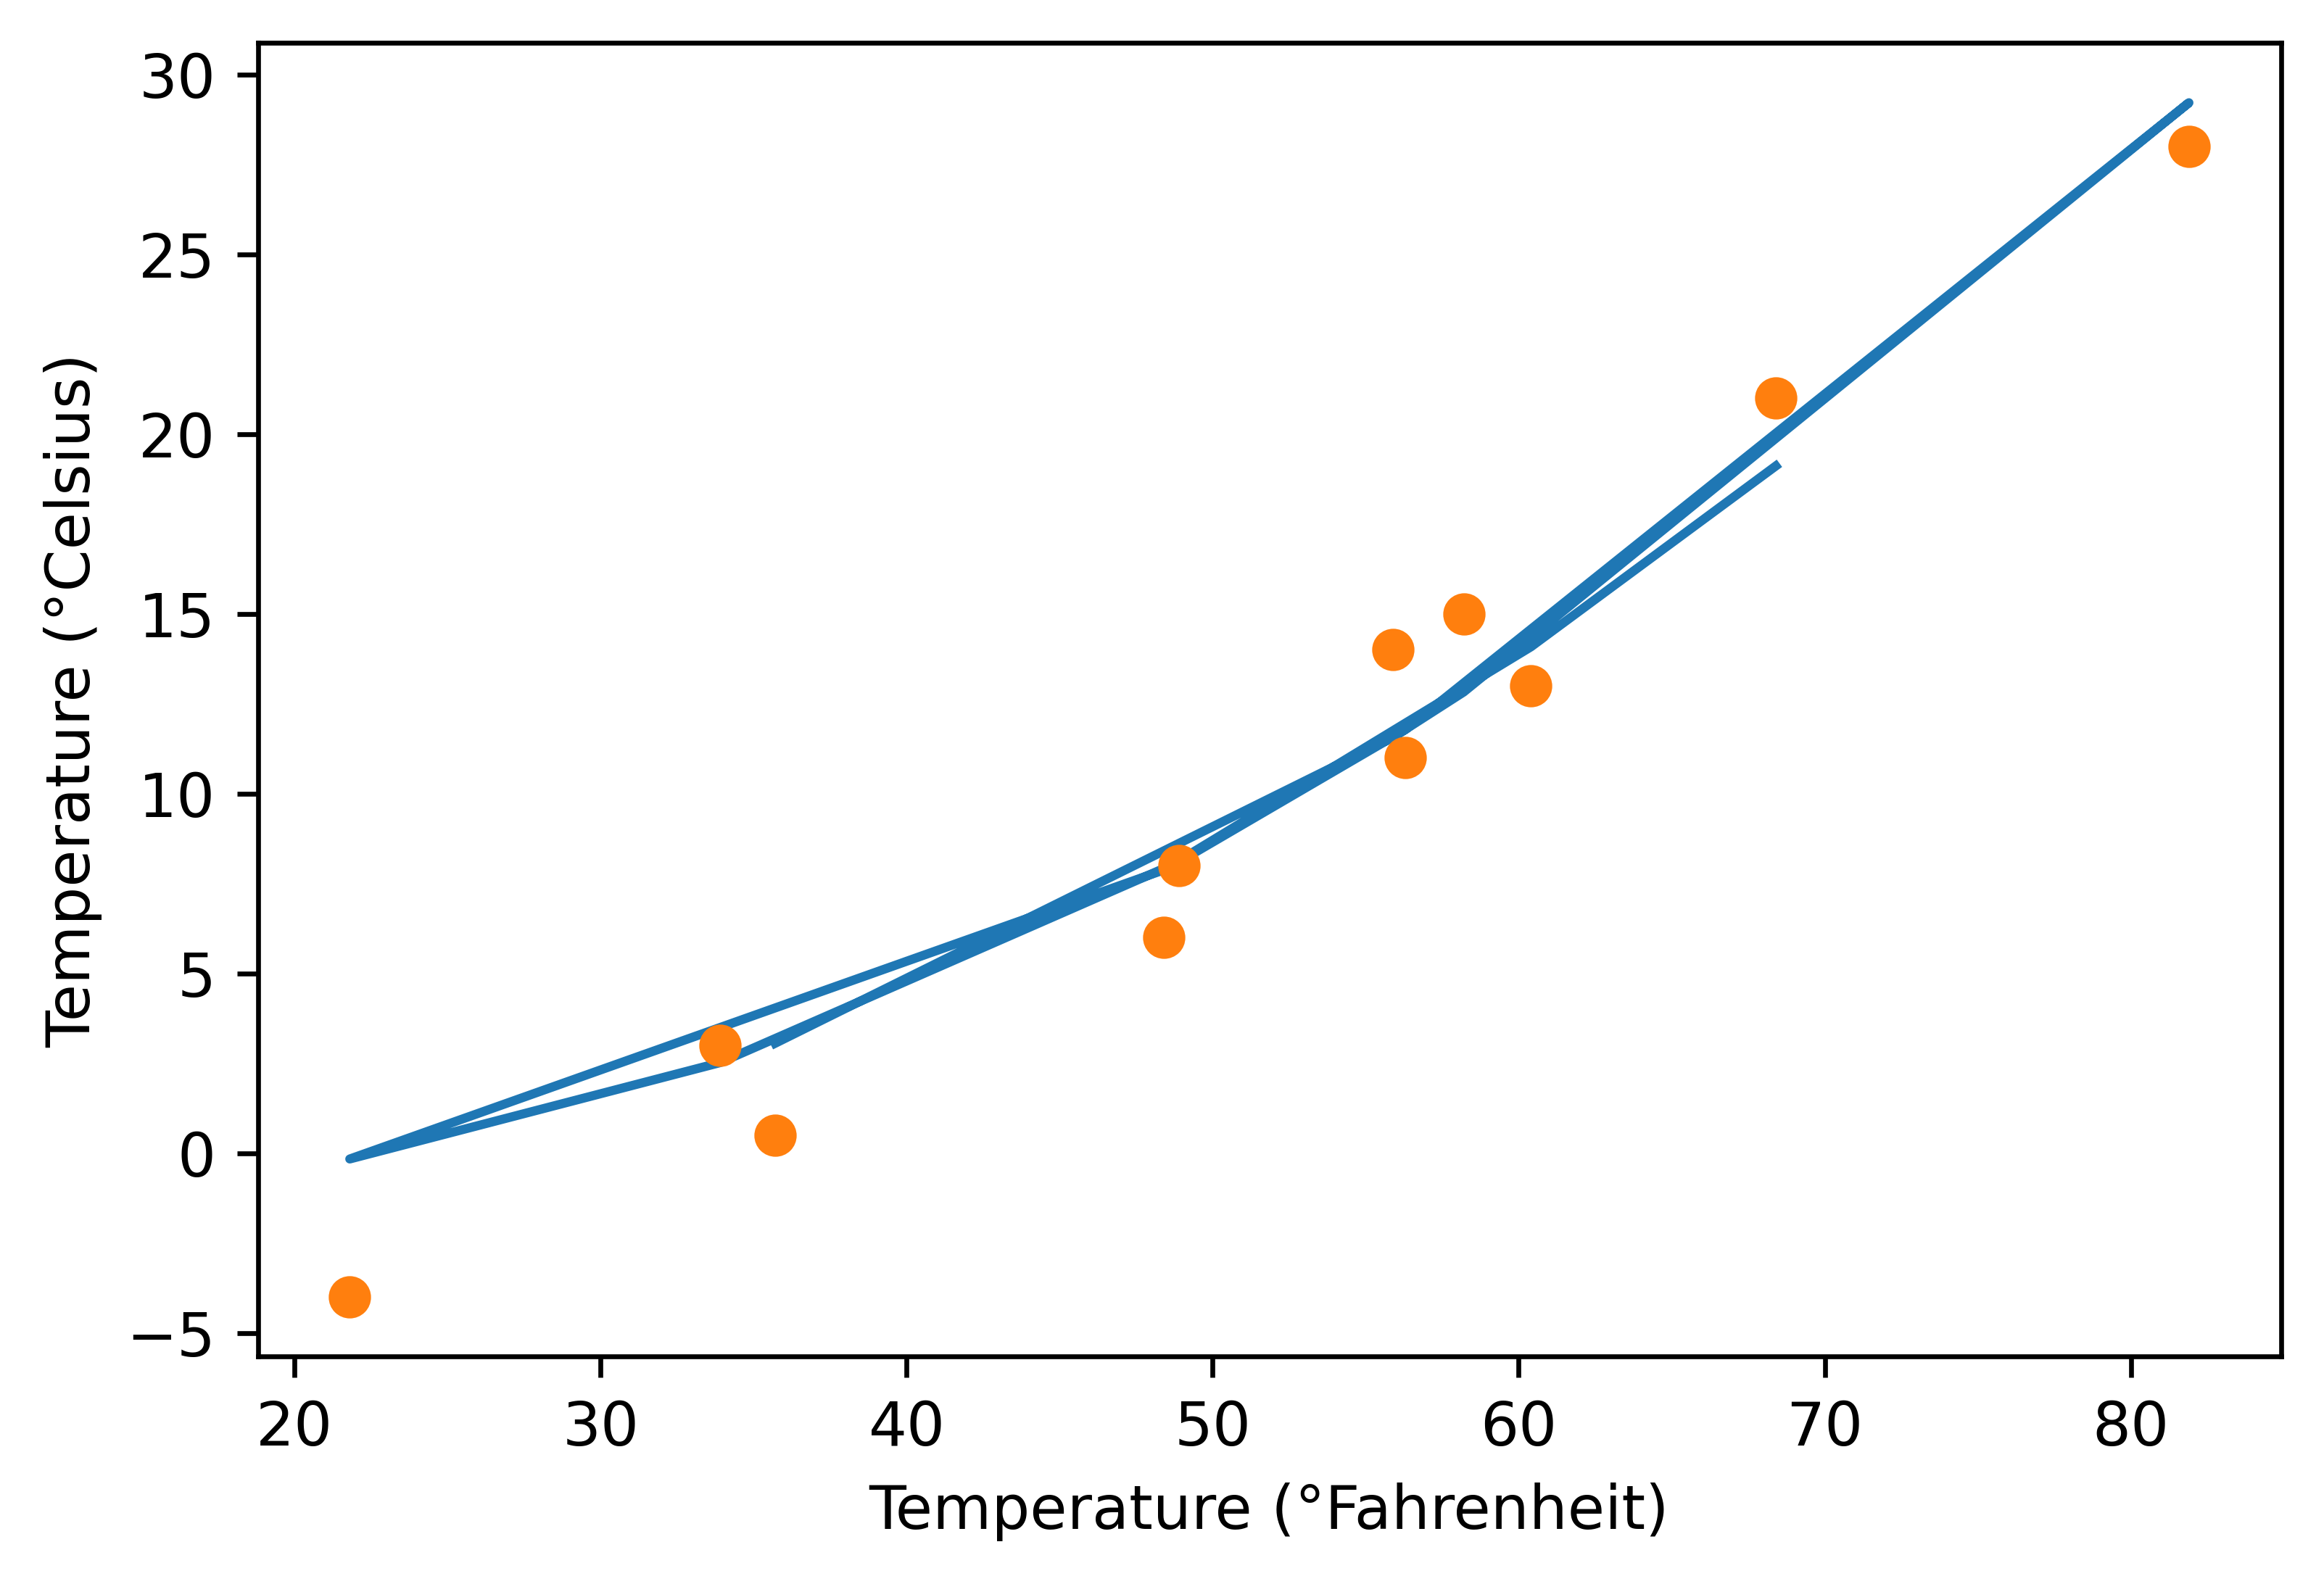

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

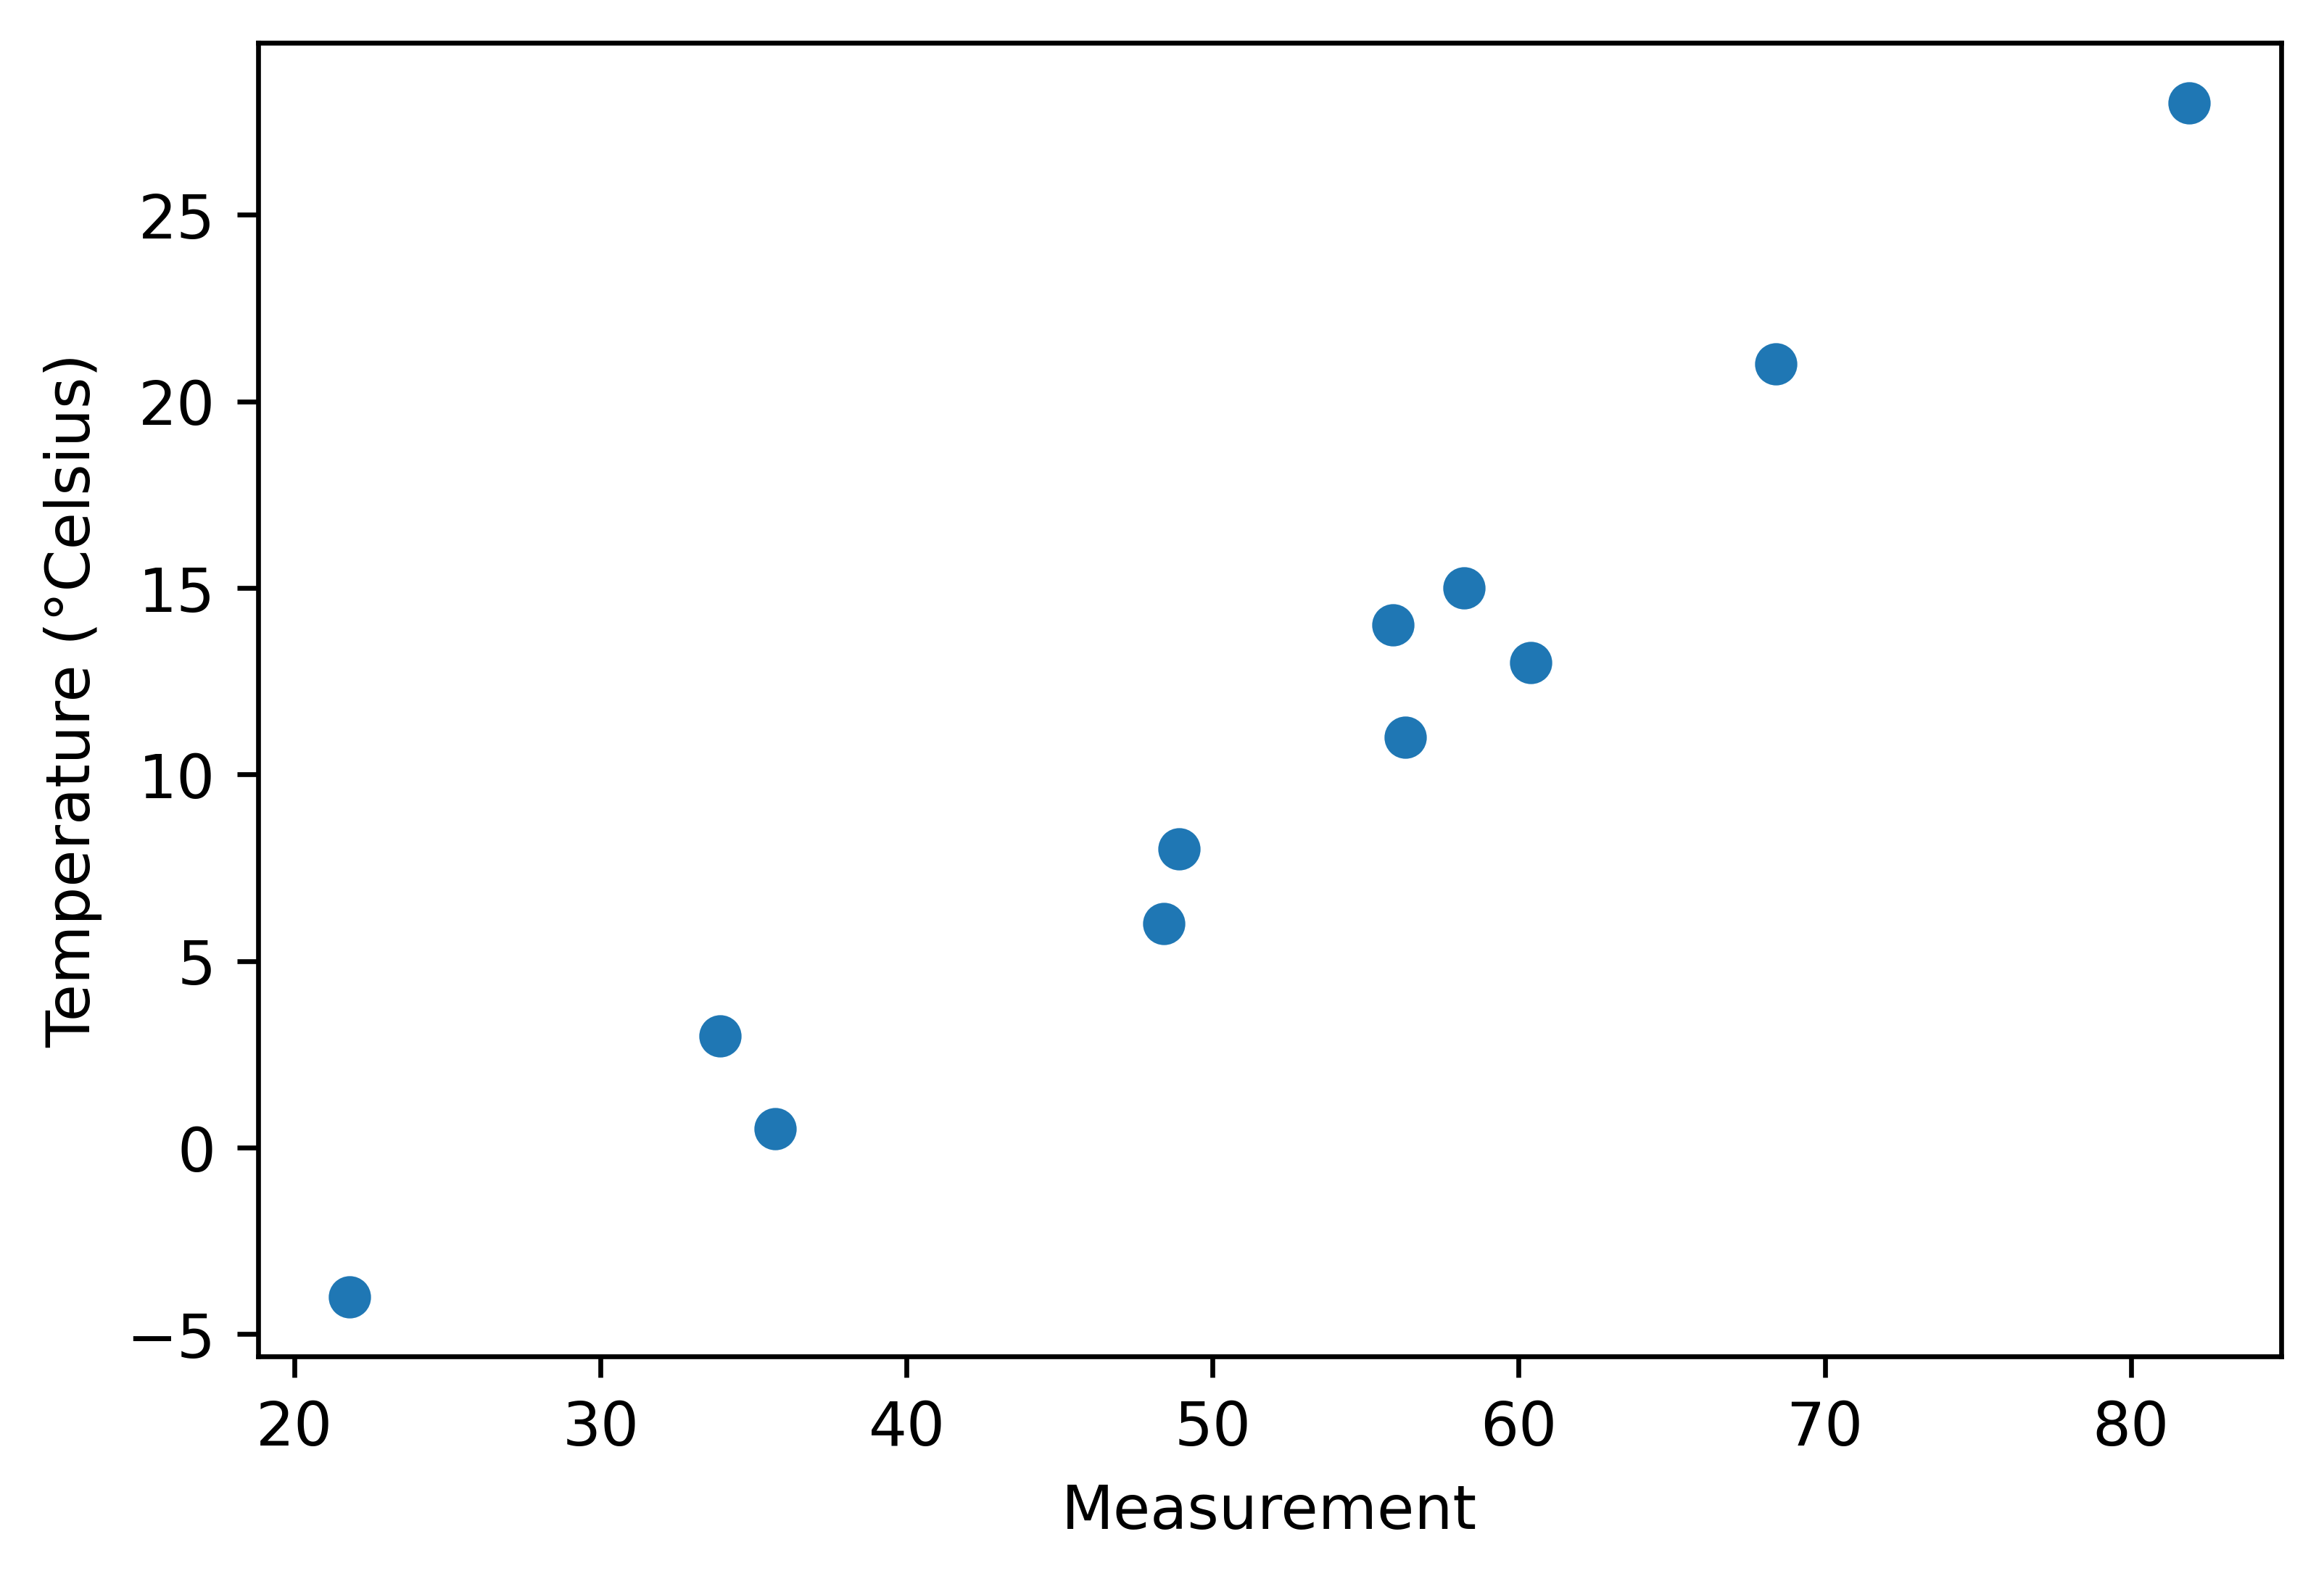

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")